#  Pre-Processing Training Data 

### Objectives

#### 1.  Create a dynamic file reader function 
#### 2.  Classify the training data based on their type ( Preamble, Governing Law etc)
#### 3.  Check for missing and unappropriate data and remove it from the dataset
#### 4.  Provide a unique Id to each data record
#### 5.  Save the dataset in the form of json for future reference
#### 6.  Visualize training dataset using charts ( Pie charts )
#### 7.  Cleaning and Tokenizing data with Natural Language Processing
#### 8.  Generating frequent words in different classses and representing it with word cloud
#### 9.  Generating Vocabulary and Dictionary of words
#### 10. Storing the dataset in the form of a sparse matrix
#### 11. Test Data Preprocessing and Storing 
#### 12. Validation Data Preprocessing and Storing



## Notebook Imports

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


from bs4 import BeautifulSoup

from wordcloud import WordCloud
from PIL import Image

import numpy as np

## File Paths - Edit the file Paths to Change the Training data set

In [128]:
#------ Manually Added Files

PREAMBLE_TRAINING_PATH = 'Training_Data/Preamble_Training_Data.csv'
OTHER_TRAINING_PATH   = 'Training_Data/Other_Training_Data.csv'
LENDER_DEFAULTING_TRAINING_PATH   = 'Training_Data/Lender_Defaulting_Training_Data.csv'
GOVERNING_LAW_TRAINING_PATH = 'Training_Data/Governing_law_Training_Data.csv'
INDEMNIFICATION_TRAINING_PATH = 'Training_Data/Indemnification_Training_Data.csv'
TESTING_DATA_PATH = 'Testing_Data/Testing_Data.csv'
VALIDATION_DATA_PATH = 'Validation_Data/Validation_Statement.csv'
VALIDATION_CLASS_PATH = 'Validation_Data/Validation_Class.csv'


#------- Files Generated in Current Step 

TRAINING_DATA_JSON_FILE = 'Training_Data/Training_Data.json'
TESTING_WORD_ID_FILE_PATH = 'Training_Data/testing_vocab_ids_2.csv'
WORD_ID_FILE_PATH = 'Training_Data/vocab_ids.csv'
TRAINING_SPARSE_MATRIX_PATH = 'Training_Data/training_sparse_matrix.csv'
TESTING_SPARSE_MATRIX_PATH = 'Testing_Data/testing_sparse_matrix.csv'
TRAINING_SPARSE_MATRIX_TXT_PATH = 'Training_Data/training_sparse_matrix.txt'
TESTING_SPARSE_MATRIX_TXT_PATH = 'Testing_Data/testing_sparse_matrix.txt'
VALIDATION_SPARSE_MATRIX_PATH = 'Validation_Data/Validation_Data_Sparse_Matrix.csv'
VALIDATION_SPARSE_MATRIX_TXT_PATH = 'Validation_Data/Validation_Data_Sparse_Matrix.txt'
VALIDATION_CLASS_SPARSE_MATRIX_TXT_PATH = 'Validation_Data/Validation_Class_Sparse_Matrix.txt'

## Constants

In [129]:
Preamble_classification_id = 0
Lender_defaulting_classification_id = 1
Governing_law_classification_id = 2
Indemnification_classification_id = 3
Other_classification_id = 4

## CSV FILE READING AND CLASSIFICATION

### The Category Column in the dataframe specifies the class of the statement as per the list below

#### Preamble = 0
#### Lender Defaulting = 1
#### Governing Law = 2
#### Indemnification = 3
#### Other = 4

In [130]:
preamble_training = pd.read_csv(PREAMBLE_TRAINING_PATH)
preamble_training['CATEGORY'] = Preamble_classification_id
preamble_training

,STATEMENT,CATEGORY
0,This CREDIT AGREEMENT is entered into as of No...,0
1,This agreement is dated 22 December 2014 and m...,0
2,"This TERM LOAN AGREEMENT, dated as of April 24...",0
3,This CREDIT AGREEMENT is entered into as of De...,0


In [131]:
lender_defaulting_training = pd.read_csv(LENDER_DEFAULTING_TRAINING_PATH)
lender_defaulting_training['CATEGORY'] = Lender_defaulting_classification_id
lender_defaulting_training

,STATEMENT,CATEGORY
0,Defaulting Lender’s right to approve or disapp...,1
1,Lender during the defaulting Period with respe...,1
2,"Any Lender defaulting, as reasonably determine...",1
3,Lender shall be deemed to be a Defaulting Lend...,1


In [132]:
governing_law_training = pd.read_csv(GOVERNING_LAW_TRAINING_PATH)
governing_law_training['CATEGORY'] = Governing_law_classification_id
governing_law_training

,STATEMENT,CATEGORY
0,This Agreement and shall be governed by and in...,2
1,The choice of South African law as the governi...,2
2,THIS AGREEMENT AND THE OTHER LOAN DOCUMENTS AN...,2
3,This Agreement shall be governed by the laws o...,2


In [133]:
indemnification_training = pd.read_csv(INDEMNIFICATION_TRAINING_PATH)
indemnification_training['CATEGORY'] = Indemnification_classification_id
indemnification_training

,STATEMENT,CATEGORY
0,Borrowers will indemnify each Lender against a...,3
1,"The Borrower shall indemnify all parties, and ...",3
2,Administrative Agent shall be entitled to reim...,3
3,Syndication Agent shall be entitled to reimbur...,3
4,The Lenders agree to indemnify the Administrat...,3


In [134]:
other_training = pd.read_csv(OTHER_TRAINING_PATH)
other_training['CATEGORY'] = Other_classification_id
other_training

,STATEMENT,CATEGORY
0,Eligible receivables are not subject to any li...,4
1,“Acceptance Condition” means the condition wit...,4
2,"Applicable Rate” means, the following percenta...",4
3,"“Disinterested Director” shall mean, with resp...",4


## Concatenating different datasets into one

In [135]:
data = pd.concat([preamble_training,lender_defaulting_training, governing_law_training,indemnification_training,other_training])
data

,STATEMENT,CATEGORY
0,This CREDIT AGREEMENT is entered into as of No...,0
1,This agreement is dated 22 December 2014 and m...,0
2,"This TERM LOAN AGREEMENT, dated as of April 24...",0
3,This CREDIT AGREEMENT is entered into as of De...,0
0,Defaulting Lender’s right to approve or disapp...,1
1,Lender during the defaulting Period with respe...,1
2,"Any Lender defaulting, as reasonably determine...",1
3,Lender shall be deemed to be a Defaulting Lend...,1
0,This Agreement and shall be governed by and in...,2
1,The choice of South African law as the governi...,2


## Checking for Empty Statements in Dataset

In [136]:
# check if there are empty emails (string length zero)
(data.STATEMENT.str.len() == 0).any()

False

In [137]:
# Remove any empty record
data.drop(data[data.STATEMENT.str.len() == 0].index, inplace=True)
data

,STATEMENT,CATEGORY
0,This CREDIT AGREEMENT is entered into as of No...,0
1,This agreement is dated 22 December 2014 and m...,0
2,"This TERM LOAN AGREEMENT, dated as of April 24...",0
3,This CREDIT AGREEMENT is entered into as of De...,0
0,Defaulting Lender’s right to approve or disapp...,1
1,Lender during the defaulting Period with respe...,1
2,"Any Lender defaulting, as reasonably determine...",1
3,Lender shall be deemed to be a Defaulting Lend...,1
0,This Agreement and shall be governed by and in...,2
1,The choice of South African law as the governi...,2


## Add Unique Ids to keep the track of the statements
### Make this Unique Id the Index of the record

In [138]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids
data.set_index('DOC_ID', inplace=True)
data

,STATEMENT,CATEGORY
DOC_ID,,
0,This CREDIT AGREEMENT is entered into as of No...,0
1,This agreement is dated 22 December 2014 and m...,0
2,"This TERM LOAN AGREEMENT, dated as of April 24...",0
3,This CREDIT AGREEMENT is entered into as of De...,0
4,Defaulting Lender’s right to approve or disapp...,1
5,Lender during the defaulting Period with respe...,1
6,"Any Lender defaulting, as reasonably determine...",1
7,Lender shall be deemed to be a Defaulting Lend...,1
8,This Agreement and shall be governed by and in...,2


## Storing the Training Dataset in JSON Format

In [139]:
data.to_json(TRAINING_DATA_JSON_FILE)

## Data Visualization

In [140]:
Preamble_count = data.CATEGORY.value_counts()[Preamble_classification_id]
Lender_defaulting_count = data.CATEGORY.value_counts()[Lender_defaulting_classification_id]
Governing_law_count =  data.CATEGORY.value_counts()[Governing_law_classification_id]
Indemnification_count = data.CATEGORY.value_counts()[Indemnification_classification_id]
Other_count = data.CATEGORY.value_counts()[Other_classification_id]

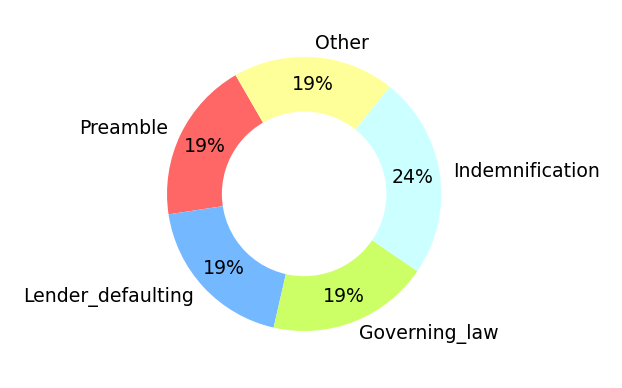

In [141]:
category_names = ['Preamble', 'Lender_defaulting' , 'Governing_law','Indemnification','Other']
sizes = [Preamble_count,Lender_defaulting_count,Governing_law_count,Indemnification_count,Other_count]
custom_colours = ['#ff6666', '#74b9ff','#ccff66','#ccffff','#ffff99']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=120, 
       autopct='%1.0f%%',colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

## Natural Language Processing

### Steps to be followed to clean the word using NLP

#### 1. Convert the entire statement to lower case
#### 2. Tokenization - Split the entire statement into separate words
#### 3.  Remove stop words - words such as pronouns, articles which are present in almost every statement and do not impact the    statements
#### 4. Stem down the words to its root - for example playing would be converted to play 
#### 5. Remove punctuations
#### 6. Remove HTML Tags

## Downloading NLP Resources

In [142]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Function to Clean Statements with NLP

In [143]:
def nlp(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    
    
    soup = BeautifulSoup(message, 'html.parser')       # ----- Remove HTML Tags                       
    cleaned_text = soup.get_text()
    
   
    words = word_tokenize(cleaned_text.lower())       #  ----- Convert the statement to lower Case and tokenize it
    
    filtered_words = []
    
    for word in words:
        if word not in stop_words and word.isalpha():  # ------ Remove Stop words and Punctuations
            filtered_words.append(stemmer.stem(word))

    
    return filtered_words

In [144]:
data_after_cleaning = data.STATEMENT.apply(nlp)        # ------ applying the nlp function
data_after_cleaning

DOC_ID
0     [credit, agreement, enter, novemb, among, dkin...
1     [agreement, date, decemb, made, parti, xyz, go...
2     [term, loan, agreement, date, april, among, pe...
3     [credit, agreement, enter, decemb, among, td, ...
4     [default, lender, right, approv, disapprov, am...
5     [lender, default, period, respect, default, le...
6     [lender, default, reason, determin, administr,...
7     [lender, shall, deem, default, lender, date, e...
8     [agreement, shall, govern, interpret, accord, ...
9     [choic, south, african, law, govern, law, fina...
10    [agreement, loan, document, claim, controversi...
11    [agreement, shall, govern, law, state, new, yo...
12    [borrow, indemnifi, lender, loss, expens, may,...
13    [borrow, shall, indemnifi, parti, relat, parti...
14    [administr, agent, shall, entitl, reimburs, re...
15    [syndic, agent, shall, entitl, reimburs, reaso...
16    [lender, agre, indemnifi, administr, agent, co...
17    [elig, receiv, subject, limit, assi

## Creating the List of Most Common Words in Preamble Class

In [145]:
preamble_index_series = data.loc[data.CATEGORY == Preamble_classification_id].index
preamble_index_series

Int64Index([0, 1, 2, 3], dtype='int64', name='DOC_ID')

In [146]:
preamble_data_after_cleaning = data_after_cleaning.loc[preamble_index_series]
preamble_data_after_cleaning

DOC_ID
0    [credit, agreement, enter, novemb, among, dkin...
1    [agreement, date, decemb, made, parti, xyz, go...
2    [term, loan, agreement, date, april, among, pe...
3    [credit, agreement, enter, decemb, among, td, ...
Name: STATEMENT, dtype: object

In [147]:
preamble_word_list = []
for sublist in preamble_data_after_cleaning:
    for item in sublist:
         preamble_word_list.append(item)
preamble_words_count = pd.Series(preamble_word_list).value_counts()
preamble_words_count

bank         5
lender       5
agreement    5
agent        5
delawar      4
            ..
document     1
swinglin     1
term         1
gold         1
financi      1
Length: 63, dtype: int64

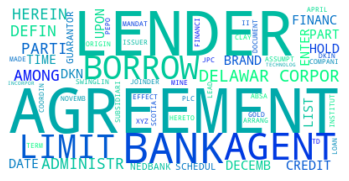

In [148]:
preamble_str = ' '.join(preamble_word_list)
word_cloud = WordCloud(background_color='white', max_font_size=200,
                       colormap='winter')

word_cloud.generate(preamble_str.upper())
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Creating the List of Most Common Words in Lender Defaulting Class

In [149]:
lender_defaulting_index_series = data.loc[data.CATEGORY == Lender_defaulting_classification_id].index
lender_defaulting_index_series


Int64Index([4, 5, 6, 7], dtype='int64', name='DOC_ID')

In [150]:
lender_defaulting_data_after_cleaning = data_after_cleaning.loc[lender_defaulting_index_series]
lender_defaulting_data_after_cleaning

DOC_ID
4    [default, lender, right, approv, disapprov, am...
5    [lender, default, period, respect, default, le...
6    [lender, default, reason, determin, administr,...
7    [lender, shall, deem, default, lender, date, e...
Name: STATEMENT, dtype: object

In [151]:
lender_defaulting_word_list = []
for sublist in lender_defaulting_data_after_cleaning:
    for item in sublist:
         lender_defaulting_word_list.append(item)
lender_defaulting_words_count = pd.Series(lender_defaulting_word_list).value_counts()
lender_defaulting_words_count.head()

lender     9
default    6
shall      3
respect    2
loan       2
dtype: int64

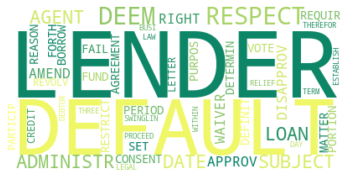

In [152]:
lender_defaulting_str = ' '.join(lender_defaulting_word_list)
word_cloud = WordCloud(background_color='white', max_font_size=200,
                       colormap='summer')

word_cloud.generate(lender_defaulting_str.upper())
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creating the List of Most Common Words in Governing Law Class

In [153]:
governing_law_index_series = data.loc[data.CATEGORY == Governing_law_classification_id].index
governing_law_index_series

Int64Index([8, 9, 10, 11], dtype='int64', name='DOC_ID')

In [154]:
governing_law_data_after_cleaning = data_after_cleaning.loc[governing_law_index_series]
governing_law_data_after_cleaning

DOC_ID
8     [agreement, shall, govern, interpret, accord, ...
9     [choic, south, african, law, govern, law, fina...
10    [agreement, loan, document, claim, controversi...
11    [agreement, shall, govern, law, state, new, yo...
Name: STATEMENT, dtype: object

In [155]:
governing_law_word_list = []
for sublist in governing_law_data_after_cleaning:
    for item in sublist:
         governing_law_word_list.append(item)
governing_law_words_count = pd.Series(governing_law_word_list).value_counts()
governing_law_words_count.head()

law          7
agreement    7
shall        6
govern       5
term         3
dtype: int64

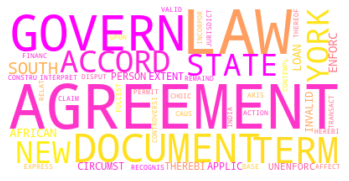

In [156]:
governing_law_str = ' '.join(governing_law_word_list)
word_cloud = WordCloud(background_color='white', max_font_size=200,
                       colormap='spring')

word_cloud.generate(governing_law_str.upper())
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creating the List of Most Common Words in Indemnification Class

In [157]:
indemnification_index_series = data.loc[data.CATEGORY == Indemnification_classification_id].index
indemnification_index_series

Int64Index([12, 13, 14, 15, 16], dtype='int64', name='DOC_ID')

In [158]:
indemnification_data_after_cleaning = data_after_cleaning.loc[indemnification_index_series]
indemnification_data_after_cleaning

DOC_ID
12    [borrow, indemnifi, lender, loss, expens, may,...
13    [borrow, shall, indemnifi, parti, relat, parti...
14    [administr, agent, shall, entitl, reimburs, re...
15    [syndic, agent, shall, entitl, reimburs, reaso...
16    [lender, agre, indemnifi, administr, agent, co...
Name: STATEMENT, dtype: object

In [159]:
indemnification_word_list = []
for sublist in indemnification_data_after_cleaning:
    for item in sublist:
         indemnification_word_list.append(item)
indemnification_words_count = pd.Series(indemnification_word_list).value_counts()
indemnification_words_count.head()

borrow      4
agent       4
expens      4
reimburs    3
incur       3
dtype: int64

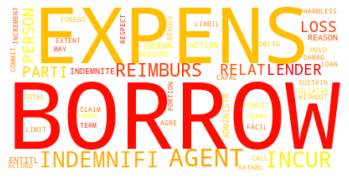

In [160]:
indemnification_str = ' '.join(indemnification_word_list)
word_cloud = WordCloud(background_color='white', max_font_size=200,
                       colormap='autumn')

word_cloud.generate(indemnification_str.upper())
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creating the List of Most Common Words in Other Class

In [161]:
other_index_series = data.loc[data.CATEGORY == Other_classification_id].index
other_index_series

Int64Index([17, 18, 19, 20], dtype='int64', name='DOC_ID')

In [162]:
other_data_after_cleaning = data_after_cleaning.loc[other_index_series]
other_data_after_cleaning

DOC_ID
17    [elig, receiv, subject, limit, assign, restric...
18    [accept, condit, mean, condit, respect, number...
19    [applic, rate, mean, follow, percentag, per, a...
20    [disinterest, director, shall, mean, respect, ...
Name: STATEMENT, dtype: object

In [163]:
other_word_list = []
for sublist in other_data_after_cleaning:
    for item in sublist:
         other_word_list.append(item)
other_words_count = pd.Series(other_word_list).value_counts()
other_words_count.head()

receiv     4
respect    3
mean       3
offer      3
secur      3
dtype: int64

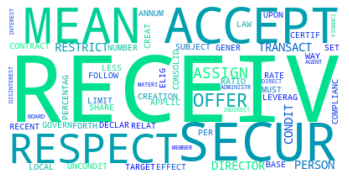

In [164]:
other_str = ' '.join(other_word_list)
word_cloud = WordCloud(background_color='white', max_font_size=200,
                       colormap='winter_r')

word_cloud.generate(other_str.upper())
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Generate Vocabulary and Dictionary

In [165]:
total_words_list = [item for sublist in data_after_cleaning  for item in sublist]
total_words_count = pd.Series(total_words_list).value_counts()
total_words_count

lender       16
shall        14
agreement    13
agent        12
law           9
             ..
coordin       1
approv        1
consolid      1
disput        1
constru       1
Length: 210, dtype: int64

In [166]:
word_ids = list(range(0, len(total_words_count)))
vocab = pd.DataFrame({'VOCAB_WORD': total_words_count.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,lender
1,shall
2,agreement
3,agent
4,law


## Save the Vocabulary as a CSV file

In [167]:
vocab.to_csv(WORD_ID_FILE_PATH, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

## Generate Training Sparse Matrix

In [168]:
# providing a separate index to each word in a sparse matrix
word_list_dataframe = pd.DataFrame.from_records(data_after_cleaning.tolist())
word_list_dataframe.head()


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,credit,agreement,enter,novemb,among,dkin,financ,delawar,corpor,borrow,...,parti,hereto,clay,bank,plc,administr,agent,swinglin,lender,issuer
1,agreement,date,decemb,made,parti,xyz,gold,mine,compani,limit,...,schedul,mandat,lead,arrang,lender,nedbank,limit,agent,financ,parti
2,term,loan,agreement,date,april,among,pepo,hold,borrow,lender,...,None,None,None,None,None,None,None,None,None,None
3,credit,agreement,enter,decemb,among,td,technolog,incorpor,delawar,corpor,...,None,None,None,None,None,None,None,None,None,None
4,default,lender,right,approv,disapprov,amend,waiver,consent,respect,agreement,...,None,None,None,None,None,None,None,None,None,None


In [169]:
## making the vocabulary words as the new word index
word_index = pd.Index(vocab.VOCAB_WORD)
word_index


Index(['lender', 'shall', 'agreement', 'agent', 'law', 'borrow', 'administr',
       'govern', 'respect', 'loan',
       ...
       'damag', 'contract', 'commit', 'amend', 'materi', 'coordin', 'approv',
       'consolid', 'disput', 'constru'],
      dtype='object', name='VOCAB_WORD', length=210)

In [170]:
def make_sparse_matrix(df, indexed_words, labels):
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'CATEGORY': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [171]:
training_sparse_matrix = make_sparse_matrix(word_list_dataframe, word_index, data.CATEGORY)
training_sparse_matrix

,CATEGORY,DOC_ID,OCCURENCE,WORD_ID
0,0,0,1,27
1,0,0,1,2
2,0,0,1,63
3,0,0,1,94
4,0,0,1,40
...,...,...,...,...
427,4,20,1,186
428,4,20,1,71
429,4,20,1,88
430,4,20,1,8


## Combining Occurance of the Same words in same statement

In [172]:
training_sparse_matrix = training_sparse_matrix.groupby(['DOC_ID', 'WORD_ID', 'CATEGORY']).sum()
training_sparse_matrix = training_sparse_matrix.reset_index()
training_sparse_matrix

,DOC_ID,WORD_ID,CATEGORY,OCCURENCE
0,0,0,0,2
1,0,2,0,2
2,0,3,0,1
3,0,5,0,1
4,0,6,0,1
...,...,...,...,...
354,20,88,4,1
355,20,166,4,1
356,20,167,4,1
357,20,186,4,1


## Saving Training Sparse Matrix in the Form of CSV AND Text File

In [173]:
training_sparse_matrix.to_csv(TRAINING_SPARSE_MATRIX_PATH)
np.savetxt(TRAINING_SPARSE_MATRIX_TXT_PATH,training_sparse_matrix)

## Testing Data Preprocessing

In [174]:
testing_data = pd.read_csv(TESTING_DATA_PATH)
testing_data

,STATEMENT
0,"Amendment No. 1 dated as of February 4, 2016 (..."
1,"Subject to the Legal Reservations, (a) the cho..."
2,"This Agreement, and any non-contractual obliga..."
3,Each Lender agrees to indemnify the Administra...
4,Any Lender that (a) has failed to (i) fund all...
5,This Assignment and Assumption shall be govern...
6,As soon as practicable after any payment of In...
7,"Non-Defaulting Lender means, at any time, each..."
8,Fundco Facility Agreement means the facility a...
9,Notwithstanding any provision of this Agreemen...


In [175]:
testing_data_after_cleaning = testing_data.STATEMENT.apply(nlp)  
testing_data_after_cleaning

0    [amend, date, februari, amend, amend, restat, ...
1    [subject, legal, reserv, choic, law, specifi, ...
2    [agreement, oblig, aris, connect, shall, gover...
3    [lender, agre, indemnifi, administr, agent, ho...
4    [lender, fail, fund, portion, loan, within, tw...
5    [assign, assumpt, shall, govern, constru, acco...
6    [soon, practic, payment, indemnifi, tax, tax, ...
7    [lender, mean, time, lender, default, lender, ...
8    [fundco, facil, agreement, mean, facil, agreem...
9    [notwithstand, provis, agreement, contrari, le...
Name: STATEMENT, dtype: object

In [176]:
total_testing__words_list = [item for sublist in testing_data_after_cleaning  for item in sublist]
total_testing_words_count = pd.Series(total_testing__words_list).value_counts()
total_testing_words_count

lender       13
agent        10
agreement     9
administr     8
law           7
             ..
fee           1
assumpt       1
disburs       1
januari       1
ag            1
Length: 136, dtype: int64

In [177]:
testing_word_ids = list(range(0, len(total_testing_words_count)))
testing_vocab = pd.DataFrame({'TESTING_VOCAB_WORD': total_testing_words_count.index.values}, index=testing_word_ids)
testing_vocab.index.name = 'WORD_ID'
testing_vocab

,TESTING_VOCAB_WORD
WORD_ID,
0,lender
1,agent
2,agreement
3,administr
4,law
...,...
131,fee
132,assumpt
133,disburs


In [178]:
testing_vocab.to_csv(TESTING_WORD_ID_FILE_PATH, index_label=testing_vocab.index.name, header=testing_vocab.TESTING_VOCAB_WORD.name)

In [179]:
testing_word_list_dataframe = pd.DataFrame.from_records(testing_data_after_cleaning.tolist())
testing_word_list_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,amend,date,februari,amend,amend,restat,agreement,date,januari,exist,...,agent,lender,capac,administr,agent,collater,agent,collater,agent,lender
1,subject,legal,reserv,choic,law,specifi,eachfin,document,govern,law,...,relev,jurisdict,None,None,None,None,None,None,None,None
2,agreement,oblig,aris,connect,shall,govern,constru,accord,english,law,...,None,None,None,None,None,None,None,None,None,None
3,lender,agre,indemnifi,administr,agent,hold,harmless,rateabl,accord,applic,...,document,transact,therein,contempl,None,None,None,None,None,None
4,lender,fail,fund,portion,loan,within,two,busi,day,date,...,written,request,administr,agent,compani,None,None,None,None,None


In [180]:
def make_testing_sparse_matrix(df, indexed_words):
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                
                
                item = {'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [181]:
testing_sparse_matrix = make_testing_sparse_matrix(testing_word_list_dataframe, word_index)
testing_sparse_matrix
# ---- passing the vocabulary of the training data and adjusting the values according to it

,DOC_ID,OCCURENCE,WORD_ID
0,0,1,203
1,0,1,22
2,0,1,203
3,0,1,203
4,0,1,2
...,...,...,...
161,9,1,140
162,9,1,1
163,9,1,0
164,9,1,11


In [182]:
testing_sparse_matrix = testing_sparse_matrix.groupby(['DOC_ID', 'WORD_ID']).sum()
testing_sparse_matrix = testing_sparse_matrix.reset_index()
testing_sparse_matrix

,DOC_ID,WORD_ID,OCCURENCE
0,0,0,3
1,0,2,2
2,0,3,4
3,0,4,1
4,0,5,1
...,...,...,...
109,9,34,1
110,9,39,1
111,9,110,1
112,9,140,1


## Saving Testing Sparse Matrix as a CSV and Text File 

In [183]:
testing_sparse_matrix.to_csv(TESTING_SPARSE_MATRIX_PATH)
np.savetxt(TESTING_SPARSE_MATRIX_TXT_PATH,testing_sparse_matrix)

## Validation Data Preprocessing

In [184]:
validation_data = pd.read_csv(VALIDATION_DATA_PATH)
validation_data

,STATEMENT
0,This CREDIT AGREEMENT is made and entered into...
1,Defaulting Lender’s right to approve or disapp...
2,The Loan Parties shall indemnify the Administr...
3,This agreement and other loan documents shall ...
4,The Borrower and certain lenders and agents ar...


In [185]:
validation_data_class = pd.read_csv(VALIDATION_CLASS_PATH)
validation_data_class

,CLASS
0,Preamble
1,Lender Defaulting
2,Indemnification
3,Governing Law
4,Other


## Replacing class by Classification ID in the dataframe

In [186]:
validation_data_class["CLASS"].where(validation_data_class["CLASS"] != "Preamble",Preamble_classification_id , inplace=True)
validation_data_class["CLASS"].where(validation_data_class["CLASS"] != "Lender Defaulting",Lender_defaulting_classification_id , inplace=True)
validation_data_class["CLASS"].where(validation_data_class["CLASS"] != "Indemnification", Indemnification_classification_id , inplace=True)
validation_data_class["CLASS"].where(validation_data_class["CLASS"] != "Governing Law", Governing_law_classification_id , inplace=True)
validation_data_class["CLASS"].where(validation_data_class["CLASS"] != "Other", Other_classification_id , inplace=True)
validation_data_class

,CLASS
0,0
1,1
2,3
3,2
4,4


In [187]:
validation_data_after_cleaning = validation_data.STATEMENT.apply(nlp)  
validation_data_after_cleaning

0    [credit, agreement, made, enter, march, among,...
1    [default, lender, right, approv, disapprov, am...
2    [loan, parti, shall, indemnifi, administr, age...
3    [agreement, loan, document, shall, govern, adh...
4    [borrow, certain, lender, agent, parti, credit...
Name: STATEMENT, dtype: object

In [188]:
validation_data_class.rename(columns = {'CLASS':'CATEGORY'}, inplace = True)
validation_data_class

,CATEGORY
0,0
1,1
2,3
3,2
4,4


In [189]:
validation_word_list_dataframe = pd.DataFrame.from_records(validation_data_after_cleaning.tolist())
validation_word_list_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,credit,agreement,made,enter,march,among,xyz,corp,wisconsin,corpor,...,collater,agent,bsb,bank,plc,capac,administr,agent,behalf,lender
1,default,lender,right,approv,disapprov,amend,waiver,consent,respect,agreement,...,requir,lender,None,None,None,None,None,None,None,None
2,loan,parti,shall,indemnifi,administr,agent,hold,indemnite,harmless,loss,...,None,None,None,None,None,None,None,None,None,None
3,agreement,loan,document,shall,govern,adher,law,unit,kingdom,None,...,None,None,None,None,None,None,None,None,None,None
4,borrow,certain,lender,agent,parti,credit,agreement,date,may,amend,...,modifi,prior,effect,date,credit,None,None,None,None,None


In [190]:
validation_sparse_matrix = make_testing_sparse_matrix(validation_word_list_dataframe, word_index)
validation_sparse_matrix = validation_sparse_matrix.groupby(['DOC_ID', 'WORD_ID']).sum()
validation_sparse_matrix = validation_sparse_matrix.reset_index()
validation_sparse_matrix

,DOC_ID,WORD_ID,OCCURENCE
0,0,0,1
1,0,2,1
2,0,3,2
3,0,5,1
4,0,6,1
...,...,...,...
57,4,22,2
58,4,27,2
59,4,74,1
60,4,183,1


## Saving Validation Sparse Matrix as a CSV and Text File

In [191]:
validation_sparse_matrix.to_csv(VALIDATION_SPARSE_MATRIX_PATH)
np.savetxt(VALIDATION_SPARSE_MATRIX_TXT_PATH,validation_sparse_matrix)
np.savetxt(VALIDATION_CLASS_SPARSE_MATRIX_TXT_PATH ,validation_data_class)